<a href="https://colab.research.google.com/github/vmoraa/BigDataCienciaDatos/blob/main/clase02_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Representación de texto

Se trata de uno de los problemas fundamentales de minería de texto y recuperación de la ianformación. El objetivo es numéricamente representar documentos de texto NO estructurado para hacerlos matemáticamente comprensibles.  



![Alt text](https://editor.analyticsvidhya.com/uploads/12860Screenshot%202021-06-15%20at%205.16.36%20PM.png)

Formalmente, se puede ver como: Para un conjunto de documentos de texto $D = {d_{i}, i=1, 2, ..., n}$, donde cada documento $d_{i}$ representa un documento, el problema de la representación de texto es mapear cada uno de los documentos $d_{i}$ en $D$ a puntos $s_{i}$ en un espacio numérico $S$, donde la distancia/similitud entre cada par de puntos en el espacio de $S$ está bien definido.


Alguna de las etapas que deberíamos considerar durante son las siguientes:

-   Limpieza de datos: limpiar y remover todo aquello que podría afectar el análisis de texto. Ejemplo: quitar caracteres especiales.

-   Integración de datos: combinar datos entre diversas fuentes en caso de ser necesario.

-   Reducción de datos: proceso de transformar el espacio de características que poseen los datos, es decir, reducir la cantidad de columnas de las instancias.

-   Transformación de datos: incorporar nuevas representaciones de los datos actuales.

In [ ]:
install.packages("tidytext")
install.packages("tidyverse")
install.packages("tm")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘ragg’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("dplyr")

In [ ]:
library("tidytext")
library("tidyverse")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Pre-procesamos el texto

Básicamente lo que queremos lograr es lo siguiente:

-   Llevar todo a manúscula
-   Reemplazar múltiples espacios en blanco por 1
-   Eliminar URLs, menciones de usuario y hashtags
-   Quitar tildes
-   Eliminar puntuación, caracteres especiales y emojis

In [ ]:
df <-  read.csv("http://users.dcc.uchile.cl/~hsarmien/diplomado/dataset/tweets_elections_sample.csv", sep = ";", na.strings=c("","NA","\\N"), encoding = "UTF-8", quote = "\"", check.names = FALSE)

In [ ]:
replacement.list <- list('á' = 'a', 'é' = 'e', 'í' = 'i', 'ó' = 'o', 'ú' = 'u', 'ü' = 'u')
df <- df %>%
  select(tweet) %>%
  mutate(tweet_prepro = tweet %>% str_to_lower) %>%
  mutate(tweet_prepro = str_replace_all(tweet_prepro," "," ")) %>%
  mutate(tweet_prepro = tweet_prepro %>% str_remove_all(pattern = '\\n')) %>% 
  mutate(tweet_prepro = tweet_prepro %>% str_remove_all(pattern = '&amp')) %>% 
  mutate(tweet_prepro = tweet_prepro %>% str_remove_all(pattern = 'https://t.co/[a-z,A-Z,0-9]*')) %>% 
  mutate(tweet_prepro = tweet_prepro %>% str_remove_all(pattern = 'http://t.co/[a-z,A-Z,0-9]*')) %>% 
  mutate(tweet_prepro = tweet_prepro %>% str_remove_all(pattern = 'https')) %>% 
  mutate(tweet_prepro = tweet_prepro %>% str_remove_all(pattern = 'http')) %>% 
  # Remove hashtags.
  mutate(tweet_prepro = tweet_prepro %>% str_remove_all(pattern = '#[a-z,A-Z,0-9]*')) %>% 
  # Remove accounts.
  mutate(tweet_prepro = tweet_prepro %>% str_remove_all(pattern = '@[a-z,A-Z,0-9,_]*'))%>%
  mutate(tweet_prepro = chartr(old = names(replacement.list) %>% str_c(collapse = ''), 
                       new = replacement.list %>% str_c(collapse = ''),
                       x = tweet_prepro)) %>% 
  mutate(tweet_prepro = gsub('[^a-zA-Z0-9\u00f1\u00d1]', ' ',tweet_prepro, perl = TRUE)) %>% 
  mutate(tweet_prepro = chartr(old = names(replacement.list) %>% str_c(collapse = ''), 
                       new = replacement.list %>% str_c(collapse = ''),
                       x = tweet_prepro)) %>% 
  mutate(tweet_prepro = gsub('[^a-zA-Z0-9\u00f1\u00d1]', ' ',tweet_prepro, perl = TRUE)) %>%
  mutate(tweet_prepro = str_squish(tweet_prepro))



In [ ]:
head(df,5)

,tweet,tweet_prepro
,<chr>,<chr>
1,"@ProvosteYasna Otra vez hablando cabezas de pescado que no vienen al caso. Preocupate de tus asuntos , de lo que estas ofreciendo al pais ! Dejate de cahuinear como loca de patio , ponte seria alguna vez.",otra vez hablando cabezas de pescado que no vienen al caso preocupate de tus asuntos de lo que estas ofreciendo al pais dejate de cahuinear como loca de patio ponte seria alguna vez
2,"..el ""laucha de supermercado"" buscando cualquier recoveco para arrancar del león.. #BoricCandidatoDelPC #BoricTieneMiedo #BoricNoseAtreveConKast ..hasta cuándo arrancas @gabrielboric ..? 🐁/🦁 #Enagro2021 😜",el laucha de supermercado buscando cualquier recoveco para arrancar del leon hasta cuando arrancas
3,Tremendo lienzo! Muchas gracias a todas las comunidades del exterior que están con nosotr@s ✊,tremendo lienzo muchas gracias a todas las comunidades del exterior que estan con nosotr
4,"@RalGuzm17108483 @EValenz11 @joseantoniokast Las FFAA chilenas no son como las venezolanas, espero que está institución que siempre ha velado por la defensa de Chile se mantenga incorrupta ... Cómo siempre lo ha hecho .... Defendido nuestra soberanía y estado de derecho",las ffaa chilenas no son como las venezolanas espero que esta institucion que siempre ha velado por la defensa de chile se mantenga incorrupta como siempre lo ha hecho defendido nuestra soberania y estado de derecho
5,@T_Real_Patriots @joseantoniokast #AtreveteConKast #AtreviDos,


In [ ]:
library("tm")

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate




In [ ]:
dft <- data.frame(doc_id = seq(1:nrow(df)), text = df$tweet_prepro)

Aplicaremos ciertas funciones en nuestro corpus para eliminar números y stopwords

In [ ]:
stopwords_es <- read.table("http://users.dcc.uchile.cl/~hsarmien/diplomado/dataset/stopwords_es.txt", stringsAsFactors = F, encoding = "utf-8", fileEncoding="latin1")
stopwords_es <- stopwords_es %>% mutate(V1 = chartr(old = names(replacement.list) %>% str_c(collapse = ''), 
                       new = replacement.list %>% str_c(collapse = ''),
                       x = V1)) 


corpus <-  Corpus(DataframeSource(dft))

tweets.text <- corpus %>% 
  tm_map(removePunctuation) %>% 
  tm_map(removeNumbers) %>% 
  tm_map(removeWords, stopwords('spanish')) %>% 
  tm_map(removeWords, stopwords_es$V1) 

El corpus ya limpio, lo transformamos a un dataframe que contenga por cada línea el texto pre-procesado y el documento (texto) donde aparece

In [ ]:
df.tweets <- data.frame(text = sapply(tweets.text, as.character), doc = 1:length(tweets.text), stringsAsFactors = FALSE)
df.tweets <- df.tweets %>% mutate(text = str_squish(text))

In [ ]:
head(df.tweets,5)

,text,doc
,<chr>,<int>
1,hablando cabezas pescado vienen caso preocupate asuntos ofreciendo dejate cahuinear loca patio ponte,1
2,laucha supermercado buscando recoveco arrancar leon arrancas,2
3,tremendo lienzo gracias comunidades exterior nosotr,3
4,ffaa chilenas venezolanas espero institucion velado defensa chile mantenga incorrupta defendido soberania derecho,4
5,,5


# N-gramas

Subsecuencia de `n` elementos de una secuencia. Si tenemos el texto `hoy estoy en clases`, al escoger `n=1` estaremos considerando el caso base que llamamos `unigramas`. Por lo tanto, obtendremos los tokens `['hoy', 'estoy', 'en', 'clases']`. Al tener `n>1` capturamos la subsecuencia de elementos que sean igual a `n`.

## Unigramas

De la librería `tidytext`, usaremos la función `unnest_tokens`que permite separar el texto de cada celda en tokens.

In [ ]:
words.df <- df.tweets %>% 
  unnest_tokens(word, text) 

word.count <- words.df %>% count(word, sort = TRUE) 

### Graficamos la densidad de la frecuencia de términos

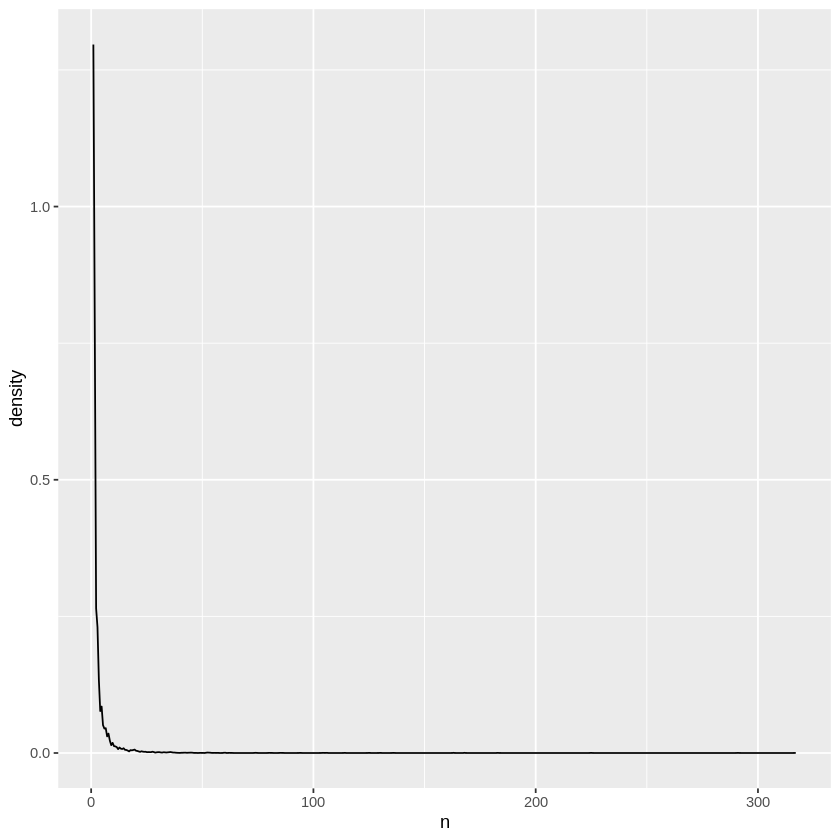

In [ ]:
ggplot(word.count, aes(x = n)) +
  geom_density()

### Graficamos los top-20 términos que más aparecen

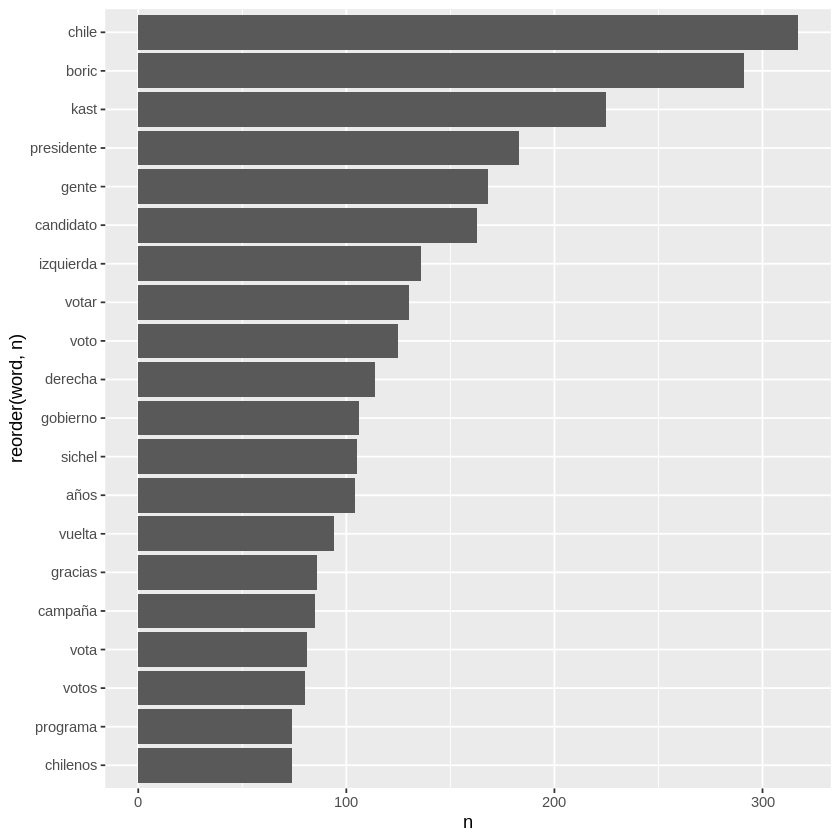

In [ ]:
ggplot(word.count[1:20,], aes(x = reorder(word,n), y = n)) + 
  #geom_bar(stat = "identity")+
  geom_col()+
  coord_flip()

## Bigramas

Haremos lo mismo que el caso anterior, pero ahora incluiremos el parámetros para separar por bigramas, es decir, secuencia de tokens de 2 términos

In [ ]:
bigram.words <- df.tweets %>% 
  unnest_tokens(
    input = text, 
    output = bigram, 
    token = 'ngrams', 
    n = 2) %>% 
  filter(! is.na(bigram))

In [ ]:
head(bigram.words,5)

,doc,bigram
,<int>,<chr>
1...1,1,hablando cabezas
1...2,1,cabezas pescado
1...3,1,pescado vienen
1...4,1,vienen caso
1...5,1,caso preocupate


Separamos los términos en 2 columnas diferentes

In [ ]:
bigram.words <- bigram.words %>% 
  separate(col = bigram, into = c('word1', 'word2'), sep = ' ') %>% 
  filter(! is.na(word1)) %>% 
  filter(! is.na(word2)) 

Contamos la cantidad de apariciones del bigrama

In [ ]:
bigram.count <- bigram.words %>% 
  count(word1, word2, sort = TRUE) %>% 
  mutate(bigram = paste(word1,word2))

### Graficamos la frecuencia de los top-20 bigramas

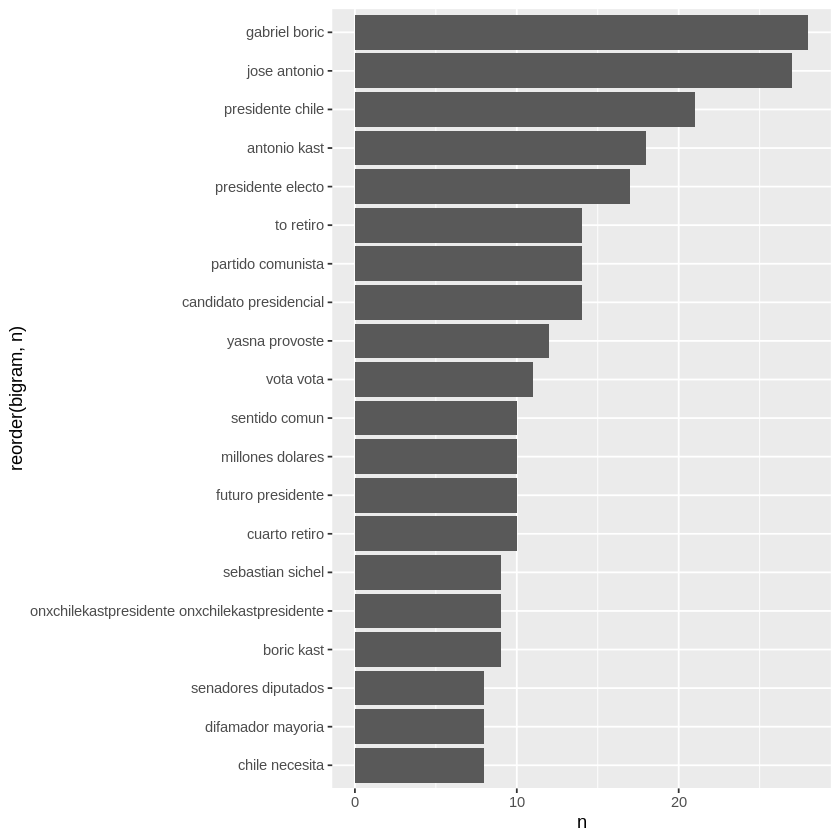

In [ ]:
ggplot(bigram.count[1:20,], aes(x = reorder(bigram,n), y = n)) + 
  geom_col()+
  coord_flip()

# Wordcloud

La nube de palabras es una representación gráfica y cualitativa de la importancia que tiene un conjunto de términos o token dentro del corpus analizado.

In [ ]:
install.packages("wordcloud")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("wordcloud")

Loading required package: RColorBrewer



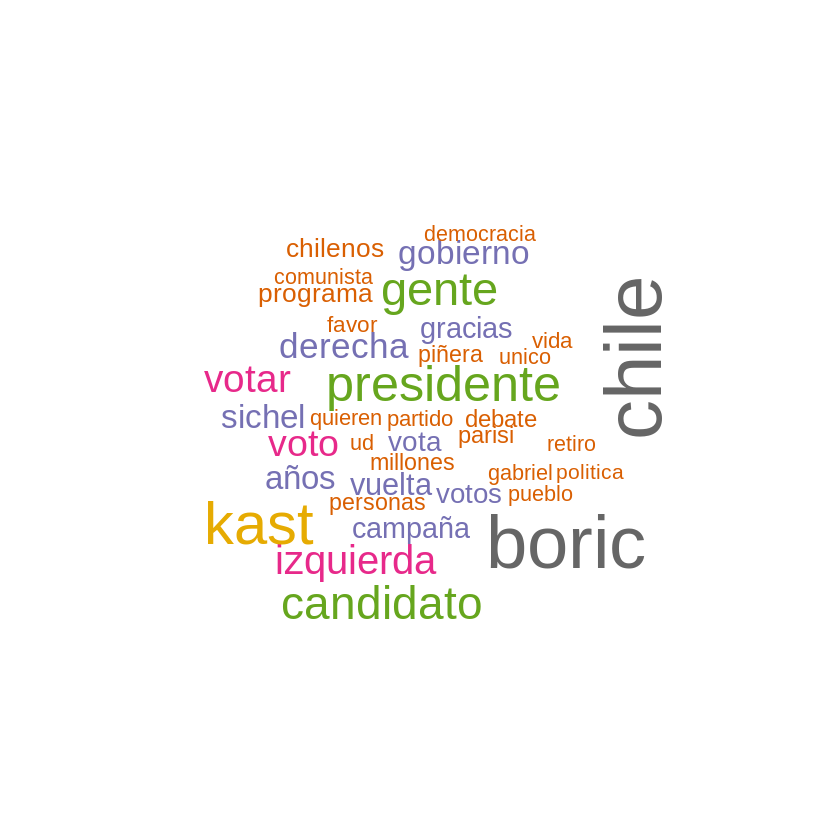

In [ ]:
wordcloud(
  words = word.count$word, 
  freq = word.count$n, 
  min.freq = 50, 
  colors = brewer.pal(8, 'Dark2')
)

Warning message in wordcloud(words = bigram.count$bigram, freq = bigram.count$n, :
“presidente electo could not be fit on page. It will not be plotted.”
Warning message in wordcloud(words = bigram.count$bigram, freq = bigram.count$n, :
“presidente chile could not be fit on page. It will not be plotted.”
Warning message in wordcloud(words = bigram.count$bigram, freq = bigram.count$n, :
“partido comunista could not be fit on page. It will not be plotted.”


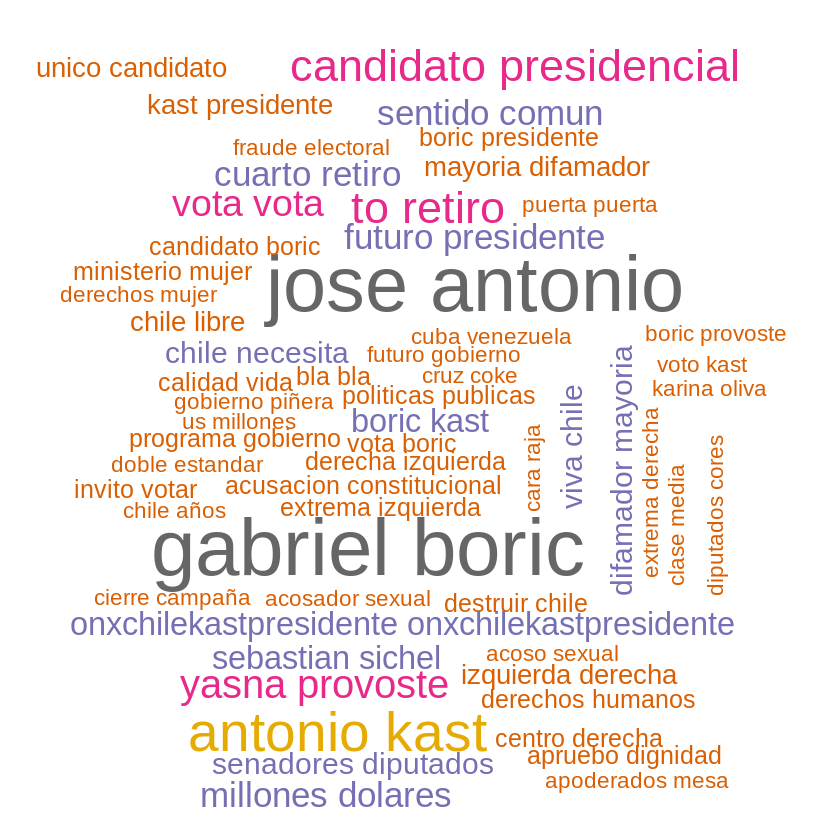

In [ ]:
wordcloud(
  words = bigram.count$bigram, 
  freq = bigram.count$n, 
  min.freq = 5, 
  colors = brewer.pal(8, 'Dark2')
)

# Matrices término-documento y documento-término

Las matrices término-documento presentan filas que corresponden a términos y las columnas a documentos, en este caso un vector de documentos se representa como una bolsa de palabras. Esta es una de las formas más comunes de modelar documentos, en la cual se cuenta la cantidad de ocurrencias (o peso) de cada término pero se ignora el orden en que aparecen, es decir, que la estructura lingüística del texto se desconoce.

![Alt text](https://qph.cf2.quoracdn.net/main-qimg-27639a9e2f88baab88a2c575a1de2005-pjlq)





## Document-term matrix

Usaremos la función `cast_dtm` la cual calcula la matriz de documento-término usando como parámetro la frecuencia de término de cada palabra por documento

In [ ]:
dtm.word <- words.df %>% group_by(doc,word)%>%summarize(n = n()) %>% cast_dtm(doc,word,n)

`summarise()` has grouped output by 'doc'. You can override using the `.groups`
argument.


Para el caso de matriz término-documento, es similar pero con la función tdm

In [ ]:
tdm.word <- words.df %>% group_by(doc,word)%>%summarize(n = n()) %>% cast_tdm(word,doc,n)

Transformamos el objeto a una matriz 

In [ ]:
dtm.matrix <- as.matrix(dtm.word)

## Calcular similitud entre documentos

Una medida de similitud clásica utilizada es la similitud coseno (no distancia)

In [ ]:
install.packages("text2vec")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘MatrixExtra’, ‘float’, ‘RhpcBLASctl’, ‘RcppArmadillo’, ‘rsparse’, ‘mlapi’, ‘lgr’




In [ ]:
library(text2vec)

In [ ]:
sim.matrix = sim2(x = dtm.matrix, method = "cosine", norm = "l2")

Vamos a crear un dataframe donde cada instance tendra la fila y columna donde aparece un valor de la similitud

In [ ]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




In [ ]:
library("reshape2")


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [ ]:
matrix_melt <- reshape2::melt(sim.matrix[1:100,1:100])
colnames(matrix_melt) <- c("v1", "v2", "value")

## Graficaremos un heatmap para mostrar las similitudes de todos los pares de documentos

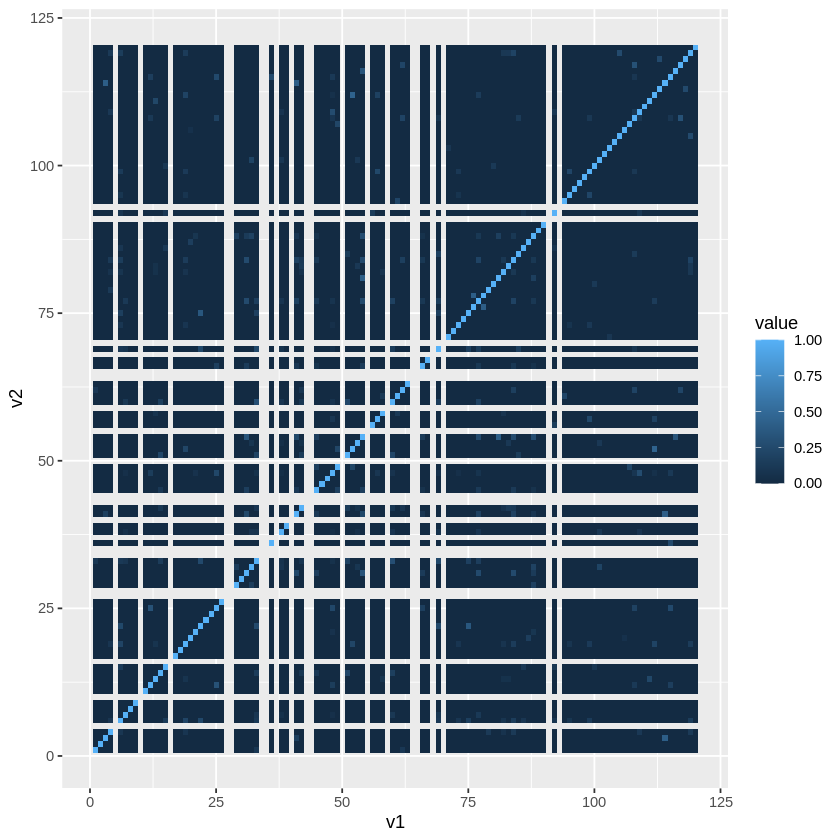

In [ ]:
ggplot(matrix_melt, aes(x = v1, y = v2, fill = value))+
  geom_tile()

# Co-ocurrencia de términos utilizando grafos

Graficaremos en una red (grafo) los bigramas que co-ocurren en nuestros documentos. La idea es que cada nodo sea un término, el cual estará conectado de manera dirigida a otro si es que la palabra siguiente que aparece en el bigrama es ese.

In [ ]:
install.packages("igraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("igraph")


Attaching package: ‘igraph’


The following object is masked from ‘package:text2vec’:

    normalize


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




De nuestro dataframe de conteo de bigramas, filtraremos un poco para que se vea mejor. Luego lo transformaremos a un objeto de grafo.

In [ ]:
bigraph <- graph_from_data_frame(bigram.count[bigram.count$n > 4,])  #filtramos solo para ver el grafo mejor

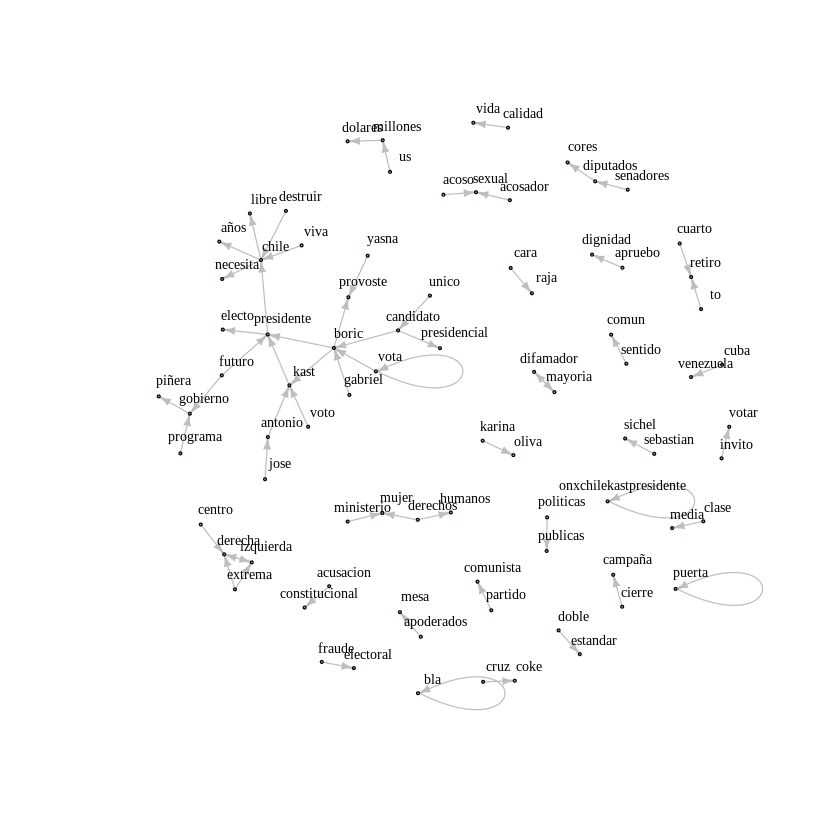

In [ ]:
plot(bigraph, 
     vertex.size = 1,
    vertex.label.color = 'black', 
    vertex.label.cex = 0.7, 
    vertex.label.dist = 1,
    edge.color = 'gray', 
    edge.arrow.size = 0.4)